## Excercise - AAC data

**Task:** 
Visualize the images of AAC (All-sky Airglow Camera) data

**Steps:**
- import libraries
- load data (.fits format) and process them
- plot data (keep in mind qualities of good data visualization)

**Bonus:**
- subtract the stars observed by N filter from measurements by G filter
- play with ranges to catch the airglow variability
- create histograms for each filter and compare them
- create a movie of 3 consecutive images in the same filter

In [1]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from dateutil.parser import parse
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from scipy import ndimage, signal

In [2]:
## load data and process them

# load data to astropy header and numpy array
aac_file = 'https://www.dropbox.com/s/gqpsfg6iu0cw6as/aac-20200521-213042.fits?dl=1'
# there are data for 4 filters in fits file. Let's plot the last one - IR (infra-red)
image_hdr3 = fits.getheader(aac_file, 3)
image_data3 = fits.getdata(aac_file, 3)

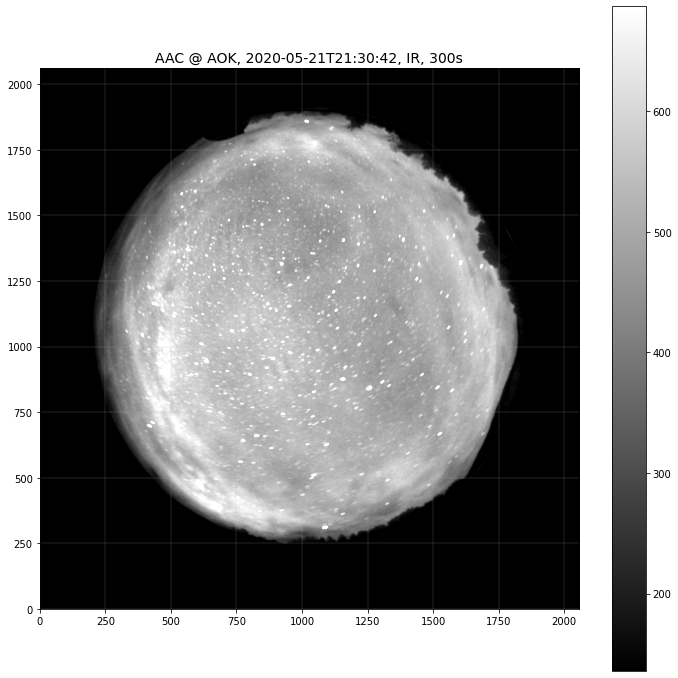

In [3]:
## plot data

plt.figure(figsize=(10, 10))
plt.title('AAC @ AOK, ' + image_hdr3['DATE-OBS'] + ', ' + image_hdr3['FILTER']
          + ', ' + str(image_hdr3['EXPTIME']) + 's', fontsize=14)
plt.imshow(image_data3, cmap='gray', vmin=np.percentile(image_data3, 50), 
           vmax=np.percentile(image_data3, 99),
           interpolation="bicubic", origin='lower')
plt.tight_layout()
#plt.xticks([])
#plt.yticks([])
plt.grid(linewidth=0.2)
plt.colorbar()
plt.show()

In [4]:
## BONUS: stars subtraction


# load data to astropy header and numpy array
aac_file = 'https://www.dropbox.com/s/gqpsfg6iu0cw6as/aac-20200521-213042.fits?dl=1'
# G filter (554.5 - 564.5 nm) data
image_hdr0 = fits.getheader(aac_file, 0)
image_data0 = fits.getdata(aac_file, 0)
# N filter (563.5 - 573.5 nm) data
image_hdr1 = fits.getheader(aac_file, 1)
image_data1 = fits.getdata(aac_file, 1)

# define center and angle of rotation
pivot = [1460, 848]
pad_x = (image_data1.shape[1]-2*pivot[1], 0)
pad_y = (0, 2*pivot[0]-image_data1.shape[0])
angle = 2.1 # G filter(0): 2.1; R filter(2): -1.05; I filter(3): -2.1

# subtract data in N filter from data in G filter
image_paded = np.pad(image_data1, [pad_y, pad_x], mode='constant').astype('int')
image_rotated = ndimage.rotate(image_paded, angle, reshape=False).astype('int')
image_cropped = image_rotated[ : image_data1.shape[0], -image_data1.shape[1] : ].astype('int')
image_subtracted = np.subtract(image_data0, image_cropped)
image_sub_median = signal.medfilt(image_subtracted, kernel_size=13)

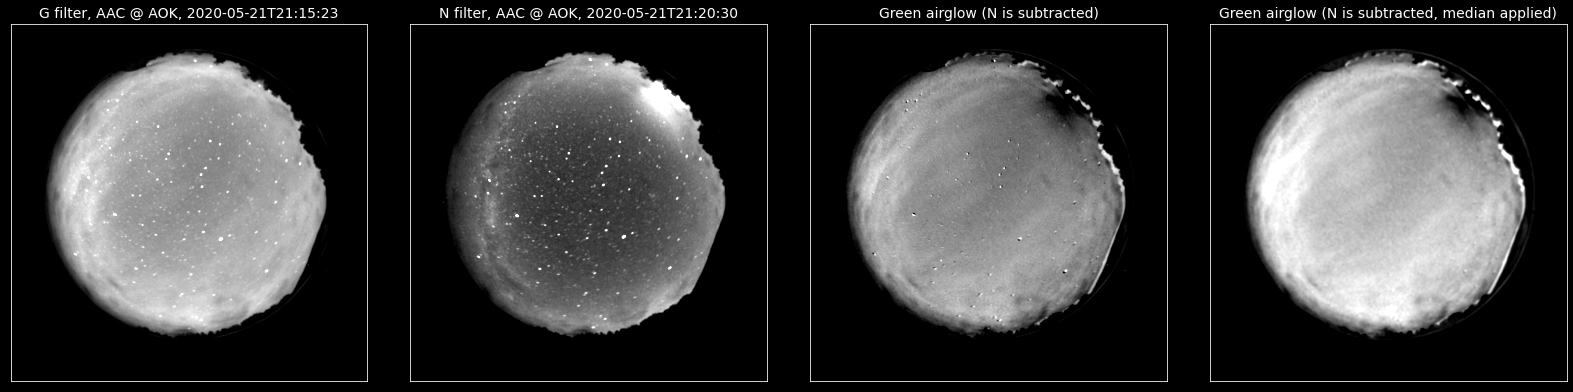

In [5]:
# change plot background
plt.switch_backend('Agg')
plt.style.use('dark_background')

# plot the data
data_list = [image_data0, image_data1, image_subtracted, image_sub_median]
title_list = ['G filter, AAC @ AOK, ' + image_hdr0['DATE-OBS'], 
              'N filter, AAC @ AOK, ' + image_hdr1['DATE-OBS'], 
              'Green airglow (N is subtracted)', 
              'Green airglow (N is subtracted, median applied)']
plt.figure(figsize=(22, 8))
gridspec.GridSpec(1, len(data_list))
for i in range(0, len(data_list)):
    plt.subplot2grid((1, 4), (0, i), colspan=1)
    plt.title(title_list[i], fontsize=14)
    plt.imshow(data_list[i], cmap='gray', vmin=np.percentile(data_list[i], 50), 
               vmax=np.percentile(data_list[i], 99),
               interpolation="bicubic", origin='lower')
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])

In [6]:
## BONUS:

# write your code here